<Axes: xlabel='HourUTC'>

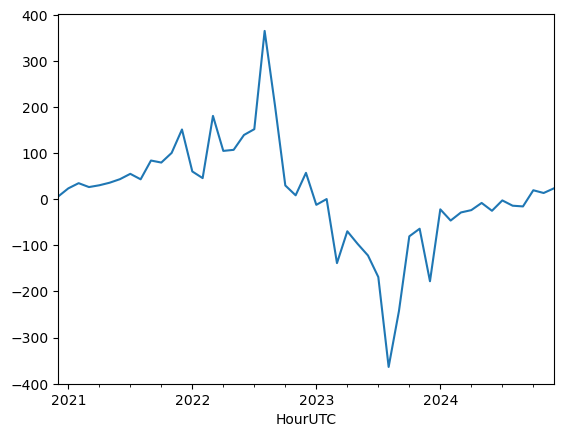

In [3]:
import pandas as pd
import glob
import os
from distfit import distfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import stats
from scipy.stats import expon,t
import numpy as np

# Read CSV and convert commas to dots for numeric columns
df = pd.read_csv("EnergyReport.csv", sep=";", decimal=",")
df = df.drop(columns=['HourDK'])
df.index = pd.to_datetime(df["HourUTC"])
df = df.drop(columns=['HourUTC'])

df_price = df["DK2_EUR/MWh"]
df_price_monthly = df_price.resample('M').mean()
df_monthly_diff = df_price_monthly.diff(12).dropna()
df_monthly_diff.plot()

In [13]:
theta_measured = (df_monthly_diff[0]-df_monthly_diff[-1])/ (len(df_monthly_diff)-1)
mu_long_term = df_monthly_diff.mean()
sigma_volatility = df_monthly_diff.std()
start = df_price_monthly.iloc[-1]

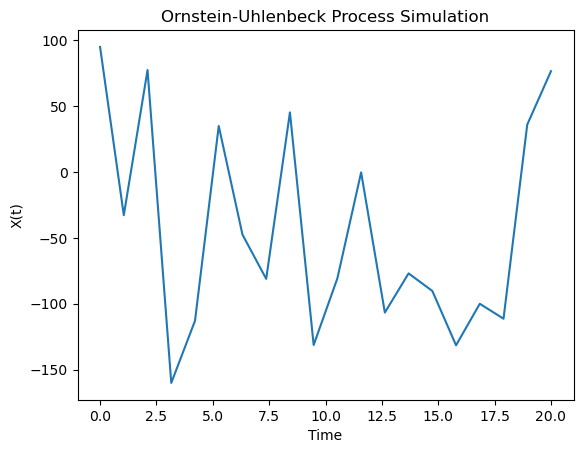

In [17]:

# Parameters for the OU process
theta = -theta_measured      # Speed of mean reversion
mu = mu_long_term         # Long-term mean
sigma = sigma_volatility      # Volatility
X0 = start         # Initial value
T = 20.0         # Total time
dt = 1        # Time step
N = int(T / dt)  # Number of time steps

# Pre-allocate array for efficiency
X = np.zeros(N)
X[0] = X0

# Generate the OU process
for t in range(1, N):
    dW = np.sqrt(dt) * np.random.normal(0, 1)
    X[t] = X[t-1] + theta * (mu - X[t-1]) * dt + sigma * dW

# Plot the result
plt.plot(np.linspace(0, T, N), X)
plt.title("Ornstein-Uhlenbeck Process Simulation")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.show()